## 1.5 Cats Vs Dogs Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import numpy as np
from PIL import Image

In [2]:
num_examples=5000
im_resolution=64

In [3]:
def load_and_preprocess_data(data_dir, n_samples_per_class=250, im_resolution=20):
    # Initialize empty array for data
    X = np.zeros((n_samples_per_class*2, im_resolution**2))  # 500 samples, 400 features (20x20 pixels)
    
    # Process cats
    cat_dir = os.path.join(data_dir, "cat")
    cat_files = os.listdir(cat_dir)[:n_samples_per_class]
    
    for i, file_name in enumerate(cat_files):
        # Load image
        img_path = os.path.join(cat_dir, file_name)
        img = Image.open(img_path)
        
        # Convert to grayscale
        img_gray = img.convert('L')
        
        # Resize to im_resolution x im_resolution
        img_resized = img_gray.resize((im_resolution, im_resolution), Image.Resampling.LANCZOS)
        
        # Convert to numpy array and flatten
        img_array = np.array(img_resized).flatten()
        
        # Add to data matrix
        X[i] = img_array
        
    # Process dogs
    dog_dir = os.path.join(data_dir, "dog")
    dog_files = os.listdir(dog_dir)[:n_samples_per_class]
    
    for i, file_name in enumerate(dog_files):
        img_path = os.path.join(dog_dir, file_name)
        img = Image.open(img_path)
        img_gray = img.convert('L')
        img_resized = img_gray.resize((im_resolution, im_resolution), Image.Resampling.LANCZOS)
        img_array = np.array(img_resized).flatten()
        X[i + n_samples_per_class] = img_array
    
    return X

In [4]:
# Example usage
# Animal faces dataset: https://www.kaggle.com/datasets/andrewmvd/animal-faces?resource=download
# You will need to downoad manually and point to the downloaded folder here:
data_dir = "/Users/stephen/Stephencwelch Dropbox/welch_labs/ai_book/1_perceptron/code/afhq/train"
X = load_and_preprocess_data(data_dir, n_samples_per_class=num_examples//2, im_resolution=im_resolution)

In [5]:
X.shape

(5000, 4096)

In [6]:
#Make label vector, 0 for dog, 1 for cat. 
y = np.zeros((num_examples), dtype ='int')
y[:num_examples//2] = 1

In [7]:
#Randomize X, y
rand_vec = np.arange(num_examples)
np.random.shuffle(rand_vec)
X_shuffled, y_shuffled = X[rand_vec, :], y[rand_vec]

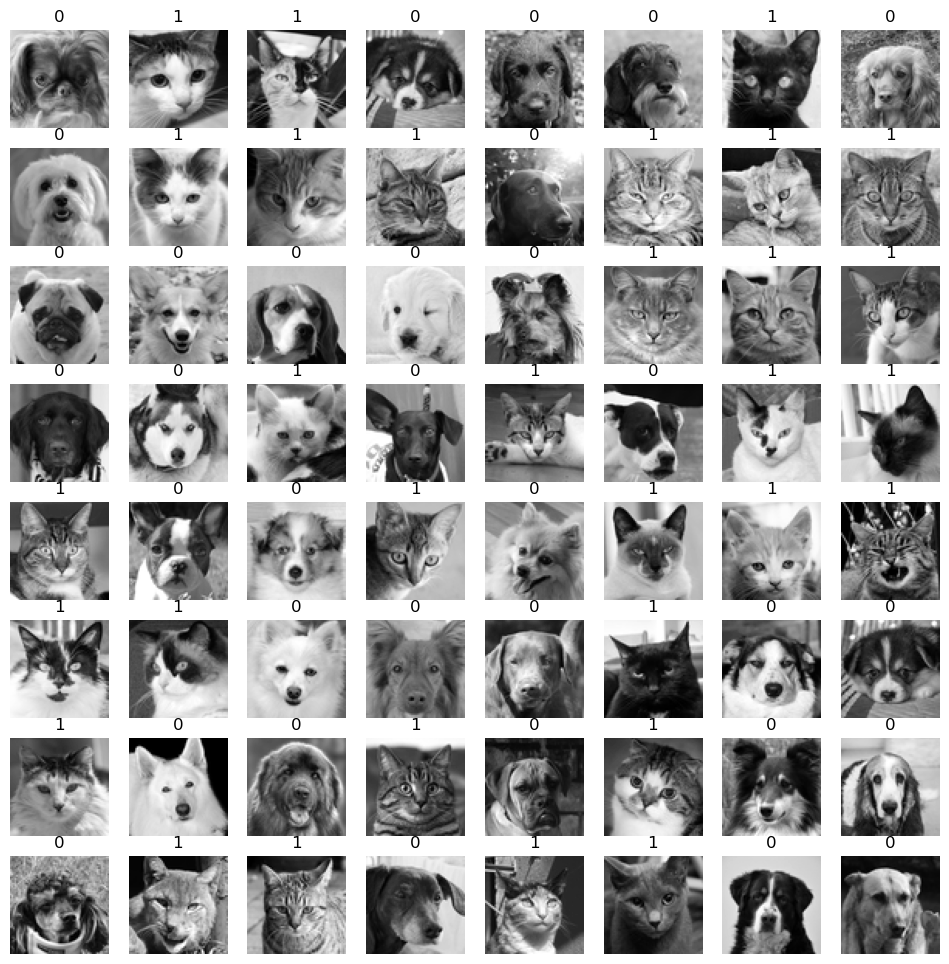

In [8]:
fig=plt.figure(0, (12,12))
for i in range(64):
    fig.add_subplot(8,8,i+1)
    plt.imshow(X_shuffled[i].reshape(64,64), cmap='gray')
    plt.title(y_shuffled[i]); plt.axis('off')

In [9]:
def neuron(x, w):
    '''Simple McCulloch-Pitts Neuron model, x and w and are numpy arrays of the same shape'''
    return np.dot(x, w) > 0

def update_nueron(w, x, label):
    '''
    Update McCulloch + Pitts Nueron using Rosenblatt's Perceptron Algorithms
    w = neuron weights, x = (n dimensional numpy array example), label = binary label
    '''
    is_correct = False
    prediction=neuron(x, w)
    if prediction == 0 and label == 1:
        w = w + x
    elif prediction == 1 and label == 0:
        w = w - x
    else:
        is_correct = True
    return w, is_correct, prediction

In [10]:
X_shuffled = np.hstack((X_shuffled, np.ones((X_shuffled.shape[0], 1)))) #Pad data with ones for bias term
X_shuffled.shape, y_shuffled.shape

((5000, 4097), (5000,))

In [11]:
# Your existing variables and computation
iterations = 5000
w = np.zeros(X_shuffled.shape[1])
error_rates=[]

for i in tqdm(range(iterations)):
    x_current = X_shuffled[i % X_shuffled.shape[0], :]
    y_current = y_shuffled[i % X_shuffled.shape[0]]
    w, is_correct, prediction = update_nueron(w, x_current, y_current)
    
    num_correct=np.sum(((np.dot(X_shuffled, w)>0).astype('int')-y_shuffled)==0)
    error_rate=(X_shuffled.shape[0]-num_correct)/X_shuffled.shape[0]
    error_rates.append(error_rate)

100%|██████████████████████| 5000/5000 [00:09<00:00, 532.11it/s]


Text(0, 0.5, 'Error Rate')

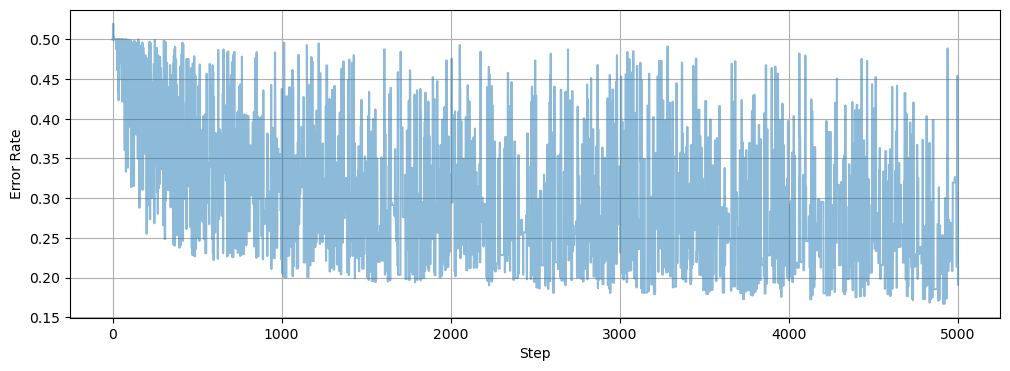

In [12]:
plt.figure(0, (12,4))
plt.plot(error_rates, alpha=0.5)
plt.grid(1)
plt.xlabel('Step'); plt.ylabel('Error Rate')